# 📰 Fake News Detection using TensorFlow

In today’s hyperconnected world, **fake news spreads faster than ever**, often leading to serious consequences — from **misinformed public opinion** and **political unrest**, to **health misinformation** and **financial panic**. Combating this issue requires intelligent systems that can distinguish between legitimate and deceptive information.

### 🎯 Objective

The goal of this project is to build a robust machine learning model using **TensorFlow** that can accurately **classify news articles as fake or real** based on their textual content. By capturing the sequential and contextual nuances of language, the model aims to contribute to **real-time misinformation detection** and uphold **information integrity** in digital platforms. 

This includes:
- Cleaning and preprocessing raw text (headlines and full articles)  
- Tokenizing and vectorizing sequences for neural network input  
- Designing and training a deep learning model, which effectively capture **sequential patterns** and **contextual dependencies** in language  
- Evaluating model performance using accuracy, confusion matrix, and ROC curve  
- Contributing towards real-time **misinformation detection** and **content validation** in digital media

> With the rise of fake news, leveraging RNN-based models like LSTM and GRU helps preserve the semantic flow of text and improve classification performance.


#### 📂 Dataset Overview

The dataset used for this project is a labeled collection of news articles consisting of two main components:

- **Title**: The headline of the news article  
- **Text**: The main body/content of the news article  
- **Label**: The target variable, where:
  - `1` indicates **fake news**
  - `0` indicates **real news**

#### 🔢 Dataset Summary:
- Format: CSV (`fake news.csv`)
- Total rows: ~20,800+
- Features: `id`, `title`, `author`, `text`, `label`
- Missing values: Present in some `author` and `title` fields

> The dataset offers a strong foundation to train a model that learns patterns in linguistic features distinguishing fake and real news.

Importing required libraries

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [58]:
import tensorflow.compat.v1 as tf

import numpy as np
import pandas as pd
import json
import csv
import random

# Import TensorFlow keras utilities
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# Import other utilities
import pprint
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Reading the data
data = pd.read_csv("fake news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
data = pd.read_csv("fake_news.csv")
data=data.drop(["Unnamed: 0"],axis=1)
data.head()

# Check shape and column info
print(f"Data consists of {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for nulls
print("\nChecking for null values:\n", data.isnull().sum())
print("\nValue counts for labels:\n", data['label'].value_counts())


Data consists of 6335 rows and 3 columns.

Checking for null values:
 title    0
text     0
label    0
dtype: int64

Value counts for labels:
 label
REAL    3171
FAKE    3164
Name: count, dtype: int64


                                title  \
count                            6335   
unique                           6256   
top     OnPolitics | 's politics blog   
freq                                5   

                                                     text label  
count                                                6335  6335  
unique                                               6060     2  
top     Killing Obama administration rules, dismantlin...  REAL  
freq                                                   58  3171  


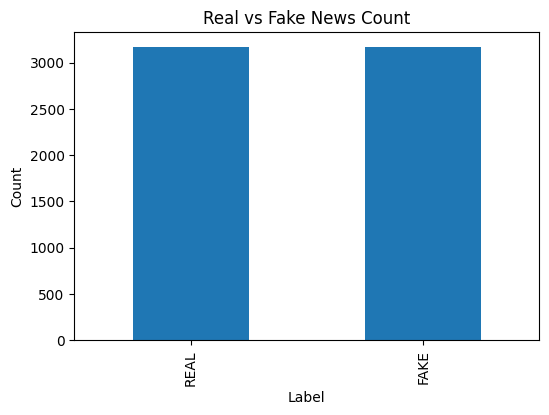

In [60]:
# Basic stats (if numerical columns exist)
print(data.describe(include='all'))

plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', title='Real vs Fake News Count')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


**Encoding labels**

In [61]:
le = LabelEncoder()
le.fit(data['label'])
data['label'] = le.transform(data['label'])

**Model Configuration:** Setting up hyperparameters and model configuration

In [62]:
max_length = 54
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=3000
test_portion=.1

Changing columns to list for further use

In [63]:
title = data['title'].tolist()
text = data['text'].tolist()
labels = data['label'].tolist()

**Text Preprocessing:**  Tokenizing and padding the text data

In [64]:
Tokenizer().fit_on_texts(title)
word_index = Tokenizer().word_index
vocab_size = len(word_index)
sequences = Tokenizer().texts_to_sequences(title)
padded = pad_sequences(sequences, padding= 'post', truncating= 'post', maxlen= 60)

**Data spliting:** train and test

In [65]:
split = int(0.8 * data.shape[0])
train_sequences = padded[0:split]
test_sequences = padded[split:data.shape[0]]
train_labels = labels[0:split]
test_labels = labels[split:data.shape[0]]

In [66]:
embeddings_index = {}
with open("C:\\Users\\majum\\OneDrive - ST. XAVIER'S COLLEGE\\glove.6B.300d.txt", encoding='utf-8') as file:
    for line in file:
        # Split the line into words and coefficients
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

Generating embeddings

In [67]:
embedding_dim = 300
# Create an embedding matrix
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

creates a sequential model in TensorFlow/Keras that combines multiple types of layers for text processing

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300 (1.17 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 300 (1.17 KB)

#### **Model explanation**   
---

#### 🔹 **Embedding Layer**
- Maps **word indices** to **dense vectors** using **pre-trained embeddings**
- `vocab_size + 1`: includes padding token
- `trainable=False`: keeps pre-trained embeddings fixed
- Uses `embeddings_matrix` loaded from pre-trained sources (e.g., GloVe)

---

#### 🔹 **Dropout Layer (0.2)**
- Randomly "drops" **20% of inputs** during training
- Prevents overfitting
- Acts as a **regularization technique**

---

#### 🔹 **1D Convolution Layer**
- Applies **64 filters** with **kernel size 5**
- Detects **local patterns** (e.g., n-grams, phrases)
- Activation: **ReLU** (introduces non-linearity)

---

#### 🔹 **MaxPooling Layer**
- Reduces sequence length via **window size = 4**
- Keeps **important features**
- Improves **computational efficiency**

---

#### 🔹 **LSTM Layer (64 units)**
- Captures **long-term dependencies** in text
- Processes sequences contextually
- Outputs a **64-dimensional vector**

---

#### 🔹 **Dense Output Layer**
- Single neuron with **sigmoid activation**
- Outputs probability between **0 and 1**
- Suitable for **binary classification** (Fake vs. Real)

---

#### ⚙️ Model Compilation

- **Loss**: `binary_crossentropy` – standard for binary classification  
- **Optimizer**: `Adam` – adaptive, widely used  
- **Metric**: `accuracy` – monitors prediction correctness  

--- 

In [80]:
num_epochs = 100

training_padded = np.array(train_sequences)
training_labels = np.array(train_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

print("Training Complete")

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5051 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5189 - loss: 0.6929 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accu

In [ ]:
X="Breaking: Aliens found living secretly in White House basement"

sequences = Tokenizer().texts_to_sequences([X])[0]
sequences = pad_sequences([sequences],maxlen= 60, padding='post', truncating='post' )
if(model.predict(sequences,verbose=0)[0][0] >= 0.5 ):
    print("This news is True")
else:
    print("This news is false")


This news is True
